In [1]:
import pandas as pd
# documents
with open('corpus.txt', 'r', encoding='utf-8') as h:
    lines = h.readlines() 
df = pd.DataFrame(lines, columns=['document'])

# meta - title
with open('titles.txt', 'r', encoding='utf-8') as h:
    titles = [l.rstrip() for l in h.readlines()]
df['title'] = titles
df.head(3)

,document,title
0,the nuclear overhauser effect noe is the tran...,Nuclear_Overhauser_effect Chemical_physics
1,a quantum solvent is essentially a superfluid...,Quantum_solvent Chemical_physics
2,coupling is a coupled rotational and vibratio...,Rovibrational_coupling Chemical_physics


In [2]:
from atap_corpus import Corpus

corpus = Corpus.from_dataframe(df, col_doc='document')
corpus

In [3]:
corpus.add_dtm(tokeniser_func=lambda d: d.split(), name='tokens')

In [4]:
from topsbm.sbmtm import sbmtm

model = sbmtm()
model.make_graph(corpus.dtms['tokens'].to_lists_of_terms(), corpus['title'].tolist())
model.fit()

<NestedBlockState object, with base <BlockState object with 3203 blocks (89 nonempty), degree-corrected, for graph <Graph object, undirected, with 3203 vertices and 13050 edges, 2 internal vertex properties, 1 internal edge property, at 0x18d089550>, at 0x18d16d450>, and 5 levels of sizes [(3203, 89), (89, 18), (18, 3), (3, 2), (2, 1)] at 0x1c05c29d0>


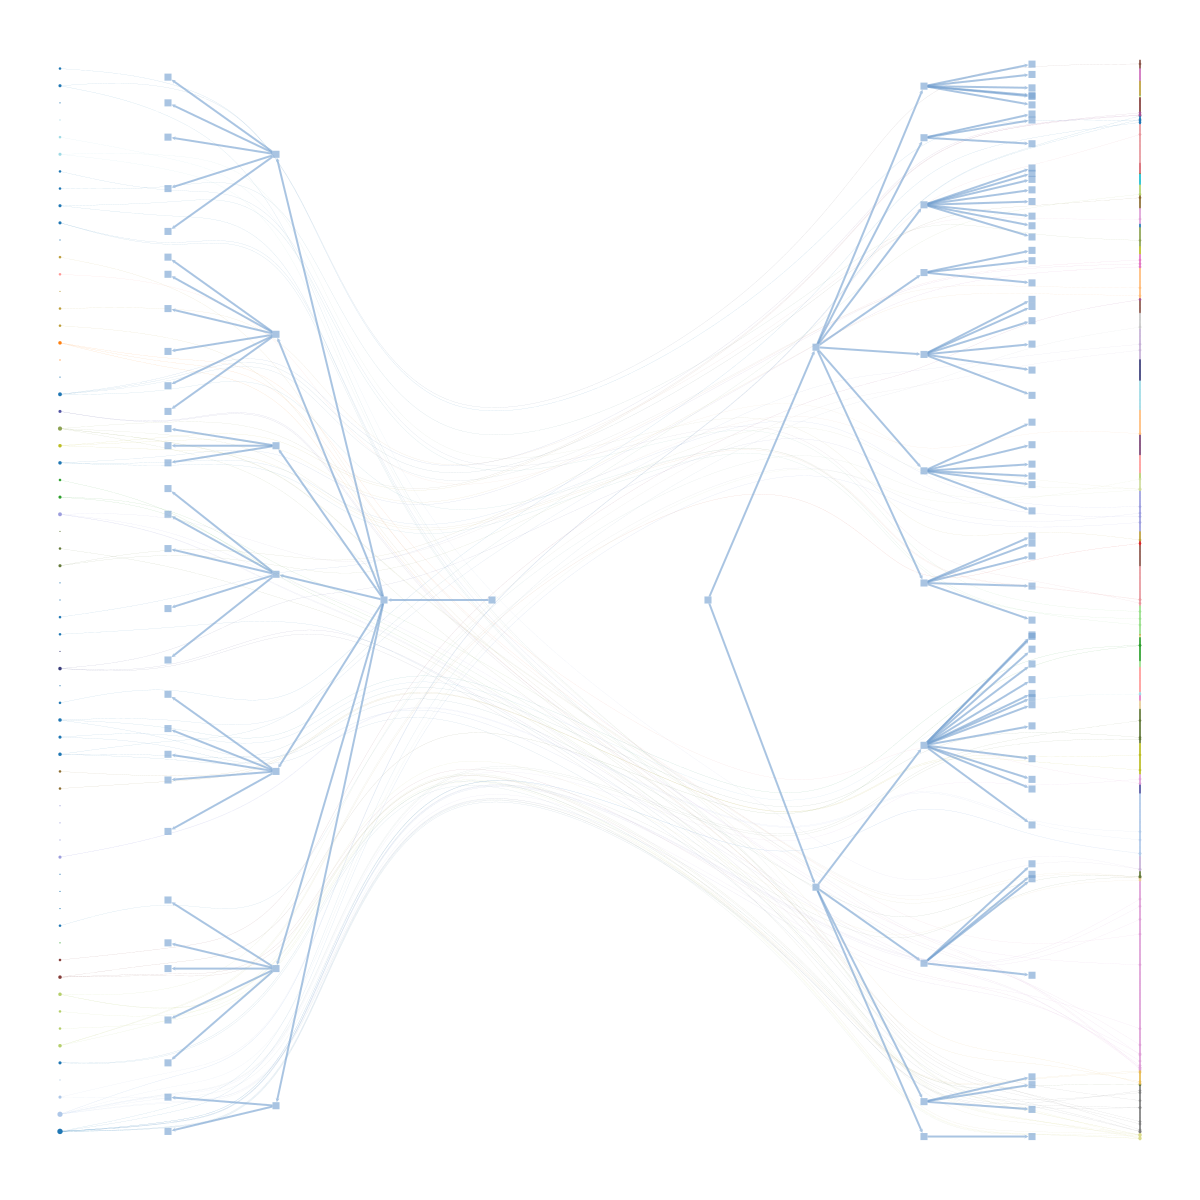

In [120]:
model.plot(nedges=100, hide_h=1)

In [45]:
model.get_groups(l=0)['p_td_d'].shape

(27, 63)

In [47]:
model.get_groups(l=0)['Bd']

27

In [46]:
len(model.documents)

63

In [59]:
model.clusters(l=0, n=2)

{0: [('Nuclear_Overhauser_effect Chemical_physics', 1.0),
  ('Dynamic_nuclear_polarisation Chemical_physics', 1.0)],
 1: [('Quantum_solvent Chemical_physics', 1.0),
  ('Elevator_paradox_(physics) Experimental_physics', 1.0)],
 2: [('Magic_angle_(EELS) Chemical_physics', 1.0),
  ('Anisotropic_liquid Chemical_physics', 1.0)],
 3: [('Effective_field_theory Chemical_physics', 1.0),
  ('Reactive_empirical_bond_order Chemical_physics', 1.0)],
 4: [('Complementary_experiments Experimental_physics', 1.0),
  ('Philosophical_interpretation_of_classical_physics Experimental_physics',
   1.0)],
 5: [('Polarizability Chemical_physics', 1.0)],
 6: [('Einstein–de_Haas_effect Experimental_physics', 1.0),
  ('Rotating_wave_approximation Chemical_physics', 1.0)],
 7: [('Molecular_vibration Chemical_physics', 1.0)],
 8: [('X-ray_crystal_truncation_rod Experimental_physics', 1.0),
  ('Empirical_formula Experimental_physics', 1.0)],
 9: [('Photofragment-ion_imaging Chemical_physics', 1.0)],
 10: [('Louis_a

In [58]:
# document clusters
# index are cluster indices i.e. doc groups
# values are ranked docs of highest probability in the doc_group.
model.clusters(l=1, n=2)

{0: [('Nuclear_Overhauser_effect Chemical_physics', 1.0),
  ('Dynamic_nuclear_polarisation Chemical_physics', 1.0)],
 1: [('Wave_tank Experimental_physics', 1.0),
  ('SnoRNA_prediction_software Experimental_physics', 1.0)],
 2: [('Magic_angle_(EELS) Chemical_physics', 1.0),
  ('Photofragment-ion_imaging Chemical_physics', 1.0)],
 3: [("Euler's_laws_of_motion Experimental_physics", 1.0),
  ('Rotating_wave_approximation Chemical_physics', 1.0)],
 4: [('Premier_Biosoft Experimental_physics', 1.0),
  ('Law_of_Maximum Experimental_physics', 1.0)],
 5: [('De_novo_transcriptome_assembly Experimental_physics', 1.0),
  ('Foldit Experimental_physics', 1.0)],
 6: [('Particle-induced_X-ray_emission Experimental_physics', 1.0),
  ('Faraday_cup_electrometer Experimental_physics', 1.0)],
 7: [('Computational_biology Experimental_physics', 1.0),
  ('Folding@home Experimental_physics', 1.0)]}

In [50]:
# word clusters
model.topics(l=0, n=20).keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])

In [72]:
model.group_membership(l=0)[1].shape # 0 is docgroup-doc, 1 is wordgroup-word

(69, 3140)

In [75]:
model.group_membership(l=0)[0].shape

(27, 63)

In [ ]:
# visualising topics (word + score clusters)
# bubblechart
# heatmap
# network graph
# dendrogram

In [ ]:
# split the results into 2 dendrograms.
# make it interactive

In [ ]:
# in the dendrograms, what we have as leafs are the docs, they're connected if they belong in the same doc group.
# then we have L1 docgroups -> L2 doc groups.

# dendrograms are created from a distance matrix.
# so each doc should have a distance to all other docs.
# the hierarchy is then produced by measuring distance between points.
# on the bottom layer, points are clustered together if they're close by. -> this creates another virtual point to measure distances from.
# then each point close to another point joins to the same cluster, if a pointer is closer to a virtual point, then it skips a level and joins that cluster instead.

In [88]:
!pip install --quiet plotly

In [90]:
len(model.documents)

63

In [83]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: >

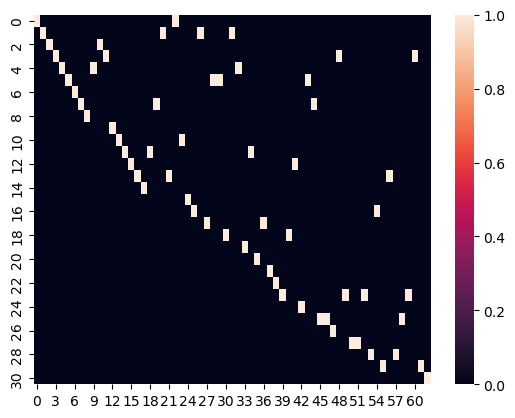

In [84]:
# there is an edge between 2 nodes if they're in the same doc group
import seaborn as sns
import pandas as pd

dgroup_memberships = model.group_membership(l=0)[0]
dgroup_memberships.shape


sns.heatmap(dgroup_memberships, cmap=None,)

In [91]:
model.state.levels

[<BlockState object with 3203 blocks (89 nonempty), degree-corrected, for graph <Graph object, undirected, with 3203 vertices and 13050 edges, 2 internal vertex properties, 1 internal edge property, at 0x18d089550>, at 0x18d129810>,
 <BlockState object with 89 blocks (18 nonempty), for graph <Graph object, undirected, with 3203 vertices and 1408 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c05c1550>, at 0x1c0797dd0>,
 <BlockState object with 14 blocks (3 nonempty), for graph <Graph object, undirected, with 89 vertices and 77 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c07966d0>, at 0x1c0797650>,
 <BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 14 vertices and 2 edges, 2 internal vertex properties, 1 internal edge property, at 0x1c0540350>, at 0x1c0538510>,
 <BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, 2 internal vertex properties, 

In [98]:
model.group_membership(l=1)[0].shape

(7, 63)

(31, 63)
(7, 63)
(1, 63)
(1, 63)
(1, 63)


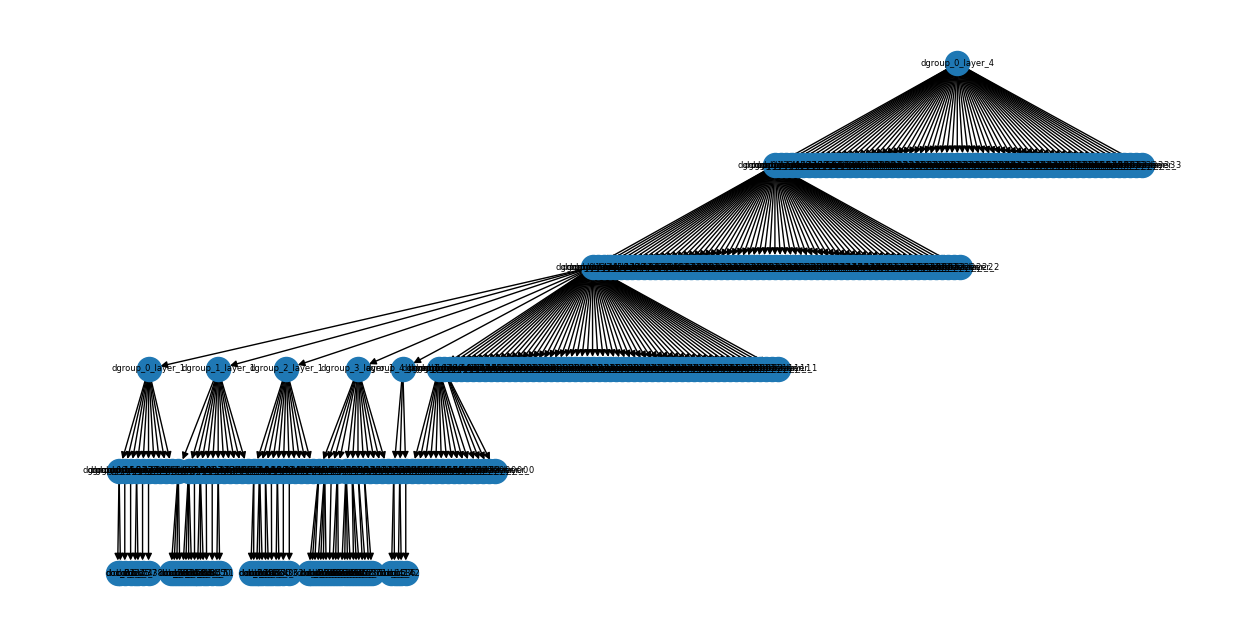

In [114]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()
for l in range(len(model.state.levels)):
    NODE_DGROUP_FMT = "dgroup_{idx}_layer_{l}"
    NODE_DOC_FMT = "doc_{idx}"
    dgroup_memberships = model.group_membership(l=l)[0]
    print(dgroup_memberships.shape)
    dgroups = [NODE_DGROUP_FMT.format(idx=idx, l=l) for idx in range(dgroup_memberships.shape[0])]
    G.add_nodes_from(dgroups, kind='doc_cluster', layer=l)
    if l == 0:
        docs = [NODE_DOC_FMT.format(idx=idx) for idx in range(dgroup_memberships.shape[1])]
        G.add_nodes_from(docs, kind='doc')
    edges = list()
    for dgroup_idx in range(dgroup_memberships.shape[0]):
        for doc_idx in range(dgroup_memberships.shape[1]):
            if dgroup_memberships[dgroup_idx, doc_idx] > 0:
                src = NODE_DGROUP_FMT.format(idx=dgroup_idx, l=l)
                if l == 0:
                    tgt = NODE_DOC_FMT.format(idx=doc_idx)
                else:
                    tgt = NODE_DGROUP_FMT.format(idx=doc_idx, l=l-1)
                    
                G.add_edge(src, tgt)

# pos = nx.spring_layout(G)
pos = nx.nx_pydot.pydot_layout(G, prog='dot')

fig, axes = plt.subplots(figsize=(16, 8))
nx.draw(G, pos=pos, edgelist=G.edges(), width=1.0, edge_color='black', node_shape='o', with_labels=True, font_size=6)

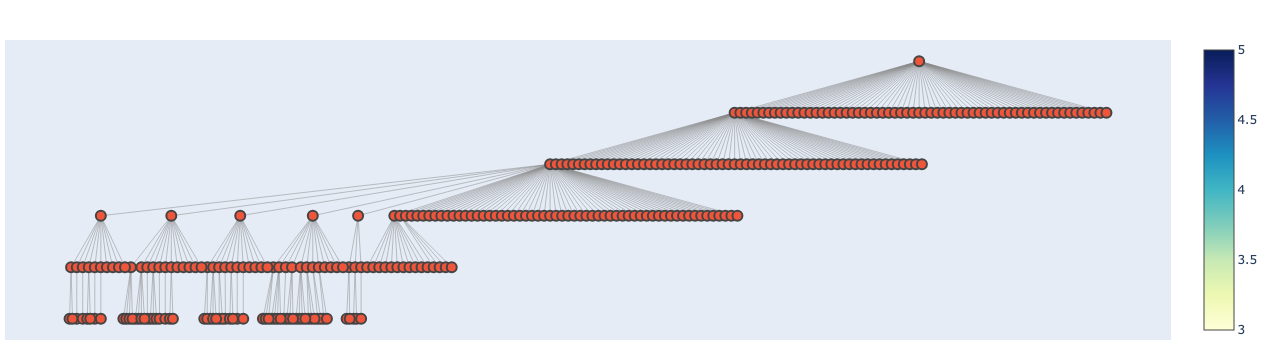

In [112]:
import plotly.graph_objs as go

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=[str(node) for node in G.nodes()],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
               layout=go.Layout(
                   showlegend=False,
                   hovermode='closest',
                   margin=dict(b=20,l=5,r=5,t=40),
                   xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                   yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                  )

fig.show()

traversing layer 1
traversing layer 2
traversing layer 3
traversing layer 4


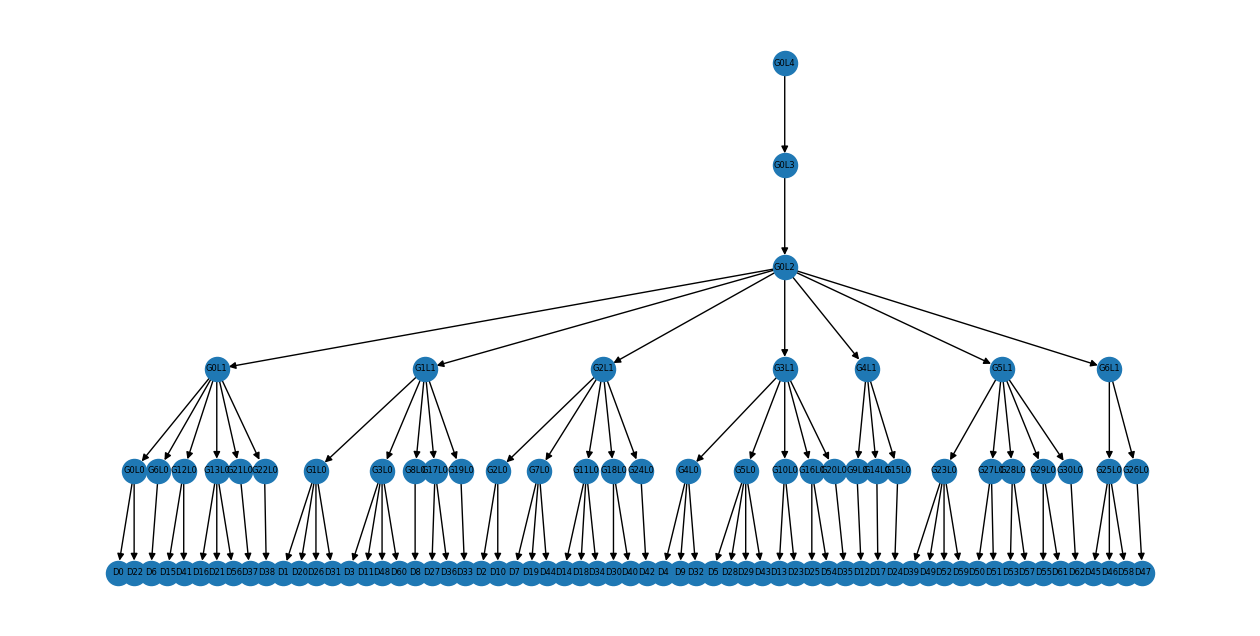

In [160]:
# doc -> doc_groups over the layers
# if layer = 0 -> point to doc
# if layer = 1 -> if connected to doc, check doc membership and add edge to previous cluster

NODE_DGROUP_FMT = "G{idx}L{l}"
NODE_DOC_FMT = "D{idx}"
G = nx.DiGraph()
# --- layer 0 ---
l = 0
dgroup_memberships = model.group_membership(l=l)[0]
dgroups = [NODE_DGROUP_FMT.format(idx=idx, l=l) for idx in range(dgroup_memberships.shape[0])]
G.add_nodes_from(dgroups, kind='doc_cluster', layer=l)
docs = [NODE_DOC_FMT.format(idx=idx) for idx in range(dgroup_memberships.shape[1])]
G.add_nodes_from(docs, kind='doc')
edges = list()
for dgroup_idx in range(dgroup_memberships.shape[0]):
    for doc_idx in range(dgroup_memberships.shape[1]):
        if dgroup_memberships[dgroup_idx, doc_idx] > 0:
            src = NODE_DGROUP_FMT.format(idx=dgroup_idx, l=l)
            tgt = NODE_DOC_FMT.format(idx=doc_idx)
            edges.append((src, tgt))
G.add_edges_from(edges)

# --- layer >= 1 ---
for l in range(1, len(model.state.levels)):
    print("traversing layer", l)
    dgroup_memberships = model.group_membership(l=l)[0]
    dgroups = [NODE_DGROUP_FMT.format(idx=idx, l=l) for idx in range(dgroup_memberships.shape[0])]
    G.add_nodes_from(dgroups, kind='doc_cluster', layer=l)
    for dg_idx in range(dgroup_memberships.shape[0]):
        for d_idx in range(dgroup_memberships.shape[1]):
            is_member = dgroup_memberships[dg_idx, d_idx]
            if is_member > 0:
                this_dgroup = NODE_DGROUP_FMT.format(idx=dg_idx, l=l)
                doc_node = NODE_DOC_FMT.format(idx=d_idx)
                # identify all the dgroup in the previous layer connected to this doc_node
                if l == 1:
                    edges = [(u, v) for u, v in G.edges() if v == doc_node and u.endswith(f"L{l-1}")]
                # identify all dgroup in the previous layer connected to a doc_node that this dgroup is connected to.
                else:
                    # bottom up approach - start with the doc nodes and work its way up.
                    # find all dgroup connected to doc_node
                    # then find the dgroup connected t
                    edges = [(u, v) for u, v in G.edges() if v == doc_node]
                    for l_tmp in range(l-1):
                        srcs = [src for src, _ in edges if src.endswith(f"L{l_tmp}")]
                        edges = [(u,v) for u, v in G.edges() if v in srcs]
                if len(edges) <= 0:
                    break
                else:
                    # connect up current dgroup with all the prior layer dgroups
                    prior_dgroups = [prior_dgroup for prior_dgroup, _ in edges]
                    for prior_dgroup in prior_dgroups:
                        G.add_edge(this_dgroup, prior_dgroup, weight=is_member)
                        
                
pos = nx.nx_pydot.pydot_layout(G, prog='dot')

fig, axes = plt.subplots(figsize=(16, 8))
nx.draw(G, pos=pos, edgelist=G.edges(), width=1.0, edge_color='black', node_shape='o', with_labels=True, font_size=6)

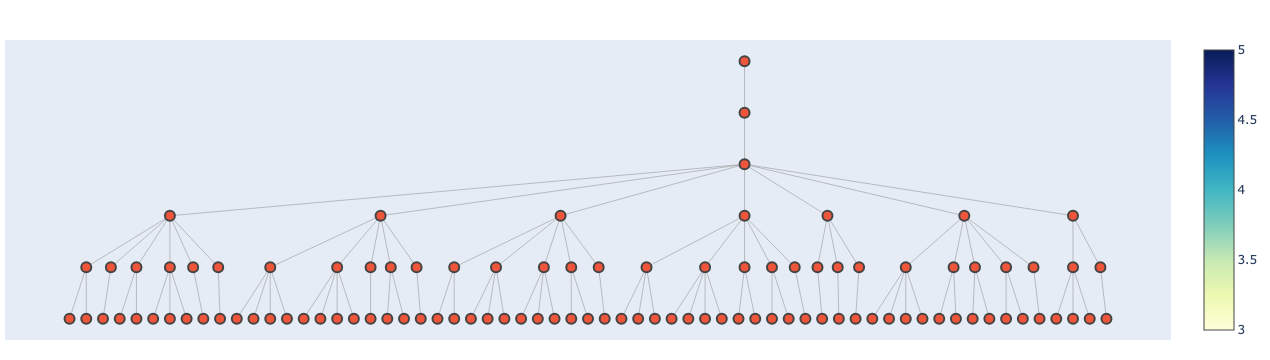

In [161]:
import plotly.graph_objs as go

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=[str(node) for node in G.nodes()],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
               layout=go.Layout(
                   showlegend=False,
                   hovermode='closest',
                   margin=dict(b=20,l=5,r=5,t=40),
                   xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                   yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                  )

fig.show()

(1, 63)

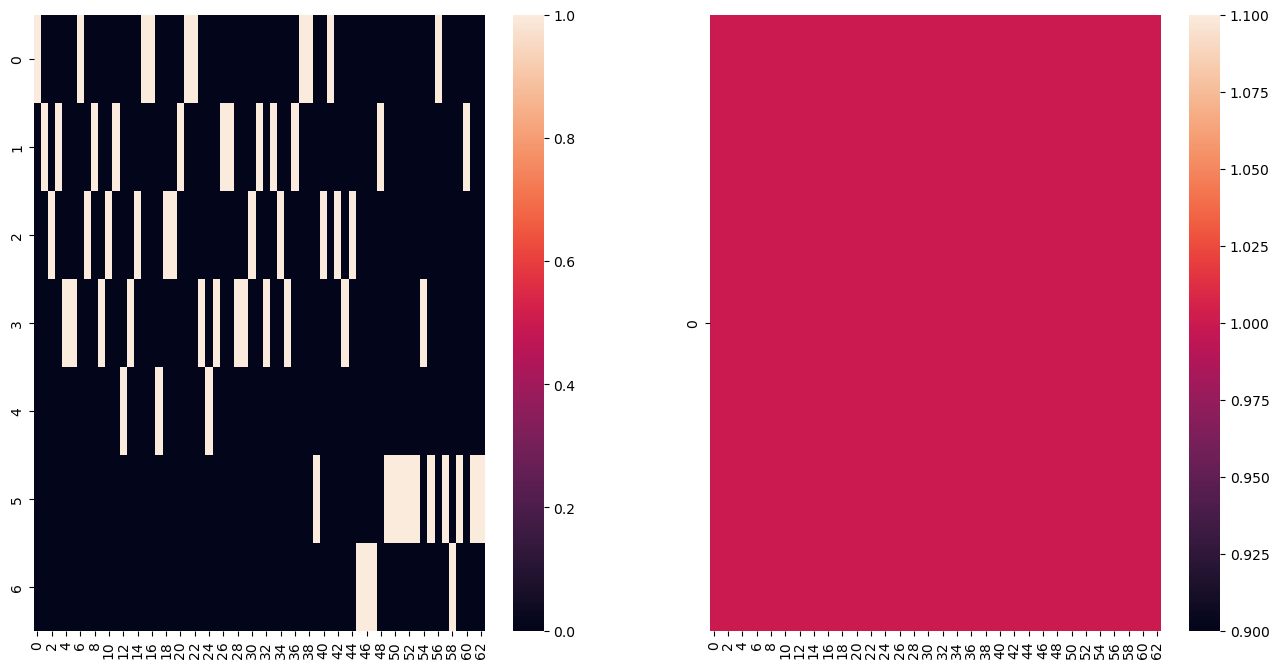

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(model.group_membership(l=1)[0], ax=axes[0])
sns.heatmap(model.group_membership(l=2)[0], ax=axes[1])
model.group_membership(l=2)[0].shape

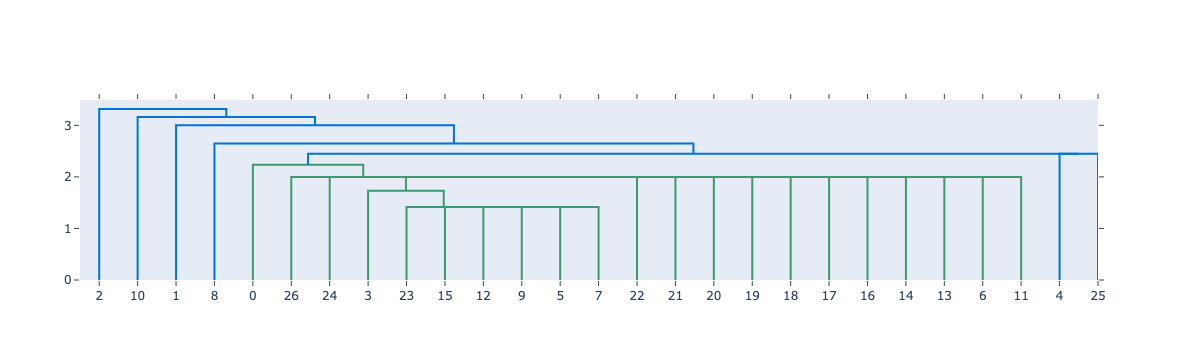

In [74]:
ff.create_dendrogram(model.group_membership(l=0)[0]).show()

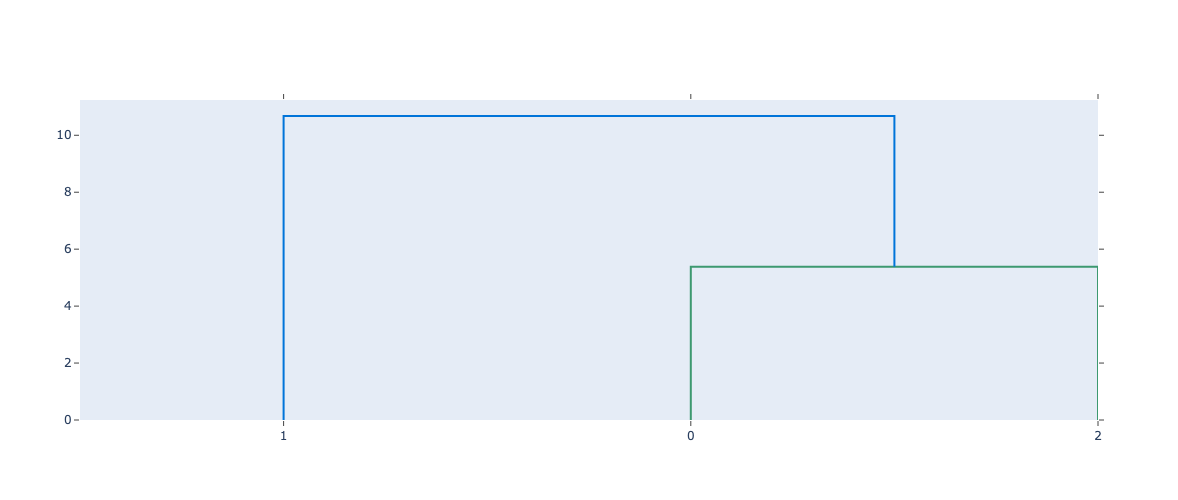

In [41]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

X = np.random.randint(1, 10, (3, 4)) # 15 samples, with 12 dimensions each
fig = ff.create_dendrogram(X)
fig.update_layout(width=800, height=500)
fig.show()

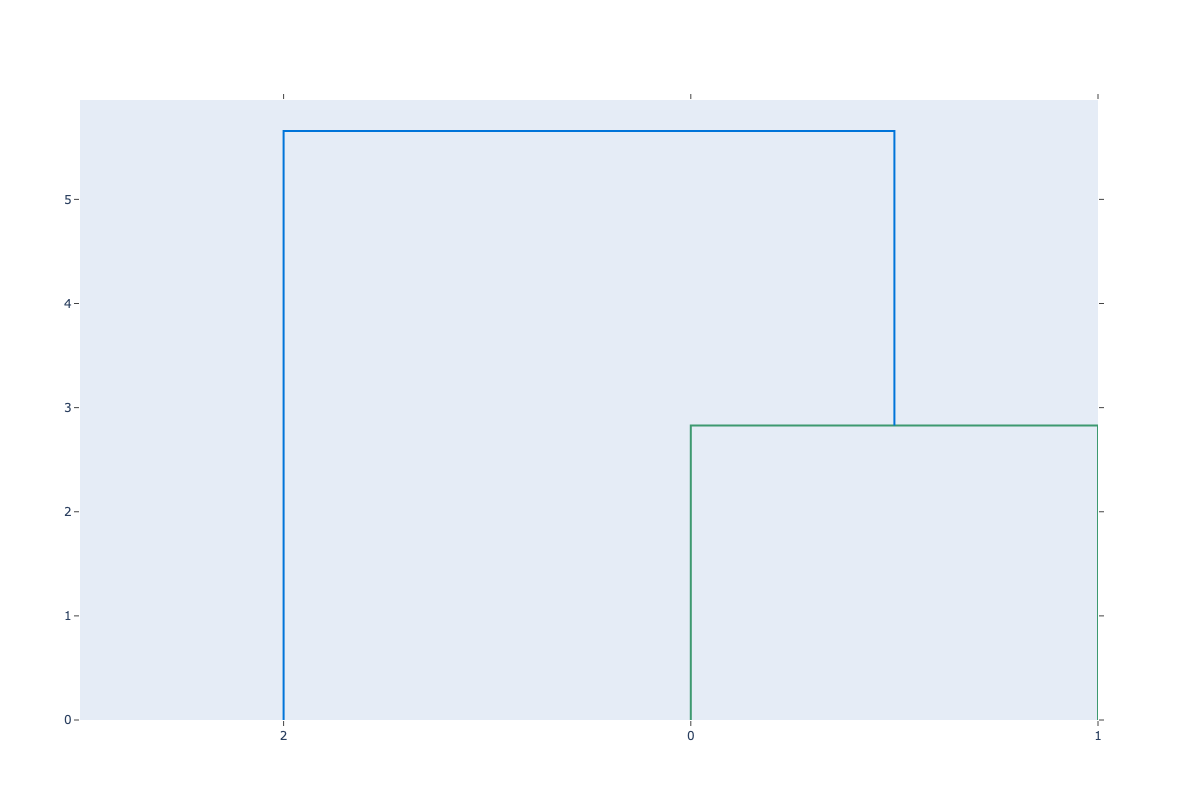

In [87]:
# how does the hierarchical clustering algorithm actually work?
# 1. 

# idx first cluster, idx second cluster, distance of clusters, # observations in new cluster

X = np.array([
    [0, 1, 1],
    [2, 3, 1],
    [4, 5, 1],
])
ff.create_dendrogram(X).update_layout(width=800, height=800).show()

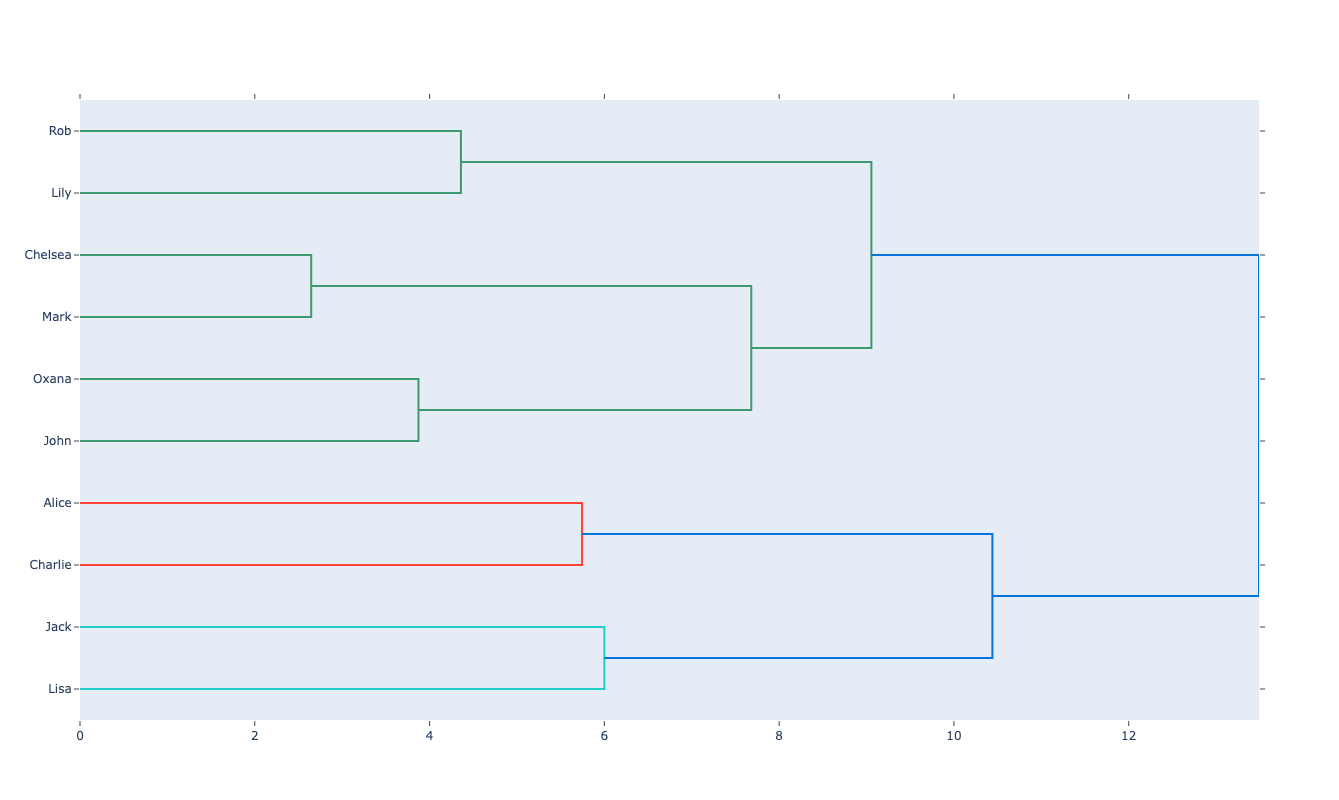

In [16]:
import plotly.figure_factory as ff

import numpy as np

X = np.random.randint(0, 10, (10,4))
names = ['Jack', 'Oxana', 'John', 'Chelsea', 'Mark', 'Alice', 'Charlie', 'Rob', 'Lisa', 'Lily']
fig = ff.create_dendrogram(X, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

In [ ]:
# then, add the metadata back into the Corpus.